In [1]:
pip install PyPDF2 pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

import os
import pandas as pd
import PyPDF2
from google.colab import files


def extract_text_from_pdf(pdf_path):
    try:
        with open(pdf_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            text = ''
            for page in range(len(reader.pages)):
                text += reader.pages[page].extract_text()
            return text
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
        return ""

def create_csv_from_resumes(root_dir, output_csv='resumes_data.csv'):
    data = []

    for category in os.listdir(root_dir):
        category_path = os.path.join(root_dir, category)
        if os.path.isdir(category_path):
            for resume_filename in os.listdir(category_path):
                if resume_filename.endswith('.pdf'):
                    resume_path = os.path.join(category_path, resume_filename)
                    resume_text = extract_text_from_pdf(resume_path)
                    print("data",resume_filename, "category",category)
                    data.append({
                        'Filename': resume_filename,
                        'Category': category,
                        'Resume': resume_text
                    })


    df = pd.DataFrame(data)
    df.to_csv(output_csv, index=False)
    print(f"CSV file '{output_csv}' created successfully!")
    files.download('/content/drive/MyDrive/dataset/data/resumes_data.csv')
if __name__ == "__main__":
    root_dir = '/content/drive/MyDrive/dataset/data/data'  # Replace with your folder path
    output_csv = '/content/drive/MyDrive/dataset/data/resumes_data.csv'
    create_csv_from_resumes(root_dir, output_csv)

data 41344156.pdf category INFORMATION-TECHNOLOGY
data 51639418.pdf category INFORMATION-TECHNOLOGY
data 25207620.pdf category INFORMATION-TECHNOLOGY
data 17688766.pdf category INFORMATION-TECHNOLOGY
data 32959732.pdf category INFORMATION-TECHNOLOGY
data 18301617.pdf category INFORMATION-TECHNOLOGY
data 31111279.pdf category INFORMATION-TECHNOLOGY
data 38753827.pdf category INFORMATION-TECHNOLOGY
data 12334140.pdf category INFORMATION-TECHNOLOGY
data 27485716.pdf category INFORMATION-TECHNOLOGY
data 66832845.pdf category INFORMATION-TECHNOLOGY
data 12635195.pdf category INFORMATION-TECHNOLOGY
data 91121135.pdf category INFORMATION-TECHNOLOGY
data 57002858.pdf category INFORMATION-TECHNOLOGY
data 40018190.pdf category INFORMATION-TECHNOLOGY
data 92069209.pdf category INFORMATION-TECHNOLOGY
data 13477922.pdf category INFORMATION-TECHNOLOGY
data 10840430.pdf category INFORMATION-TECHNOLOGY
data 25959103.pdf category INFORMATION-TECHNOLOGY
data 26480367.pdf category INFORMATION-TECHNOLOGY


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/dataset/data/resumes_data.csv')
df.head()


,Filename,Category,Resume
0,41344156.pdf,INFORMATION-TECHNOLOGY,VP OF INFORMATION TECHNOLOGY\nExecutive Profil...
1,51639418.pdf,INFORMATION-TECHNOLOGY,INFORMATION TECHNOLOGY BUREAU DEPUTY DIRECTOR\...
2,25207620.pdf,INFORMATION-TECHNOLOGY,INFORMATION TECHNOLOGY CERTIFIED TECHNICIAN\nS...
3,17688766.pdf,INFORMATION-TECHNOLOGY,DIRECTOR OF INFORMATION TECHNOLOGY\nSummary\nI...
4,32959732.pdf,INFORMATION-TECHNOLOGY,"SENIOR DIRECTOR, INFORMATION TECHNOLOGY\nExecu..."


In [5]:
print(df.info())
print(df['Category'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  2484 non-null   object
 1   Category  2484 non-null   object
 2   Resume    2483 non-null   object
dtypes: object(3)
memory usage: 58.3+ KB
None
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
CHEF                      118
ACCOUNTANT                118
ENGINEERING               118
ADVOCATE                  118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE        

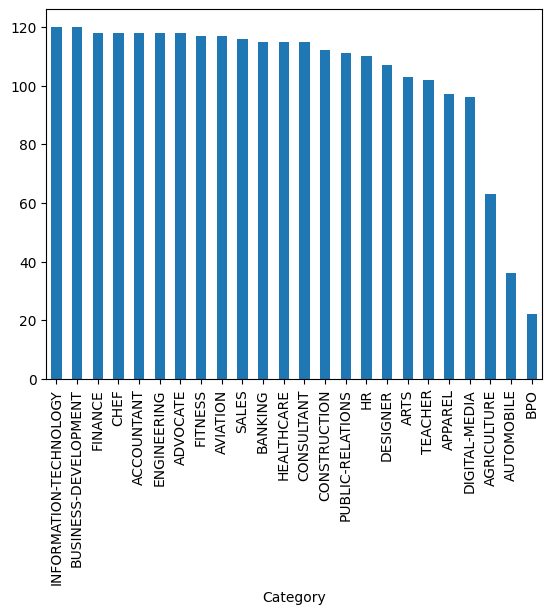

In [6]:
import matplotlib.pyplot as plt

df['Category'].value_counts().plot(kind='bar')
plt.show()


In [10]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')


stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        filtered_words = [word for word in tokens if word not in stop_words]
        return ' '.join(filtered_words)
    else:
        return ""

df['cleaned_resume'] = df['Resume'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
df.head()

,Filename,Category,Resume,cleaned_resume
0,41344156.pdf,INFORMATION-TECHNOLOGY,VP OF INFORMATION TECHNOLOGY\nExecutive Profil...,vp information technology executive profile re...
1,51639418.pdf,INFORMATION-TECHNOLOGY,INFORMATION TECHNOLOGY BUREAU DEPUTY DIRECTOR\...,information technology bureau deputy director ...
2,25207620.pdf,INFORMATION-TECHNOLOGY,INFORMATION TECHNOLOGY CERTIFIED TECHNICIAN\nS...,information technology certified technician su...
3,17688766.pdf,INFORMATION-TECHNOLOGY,DIRECTOR OF INFORMATION TECHNOLOGY\nSummary\nI...,director information technology summary direct...
4,32959732.pdf,INFORMATION-TECHNOLOGY,"SENIOR DIRECTOR, INFORMATION TECHNOLOGY\nExecu...",senior director information technology executi...


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_resume'])


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, df['Category'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [15]:
y_pred_val = model.predict(X_val)


In [16]:
from sklearn.metrics import classification_report

y_pred_test = model.predict(X_test)
print(classification_report(y_test, y_pred_test))


                        precision    recall  f1-score   support

            ACCOUNTANT       0.78      0.82      0.80        17
              ADVOCATE       0.38      0.47      0.42        19
           AGRICULTURE       0.80      0.44      0.57         9
               APPAREL       0.43      0.25      0.32        12
                  ARTS       0.55      0.55      0.55        11
            AUTOMOBILE       0.00      0.00      0.00         9
              AVIATION       0.79      0.83      0.81        18
               BANKING       0.79      0.56      0.65        27
                   BPO       0.00      0.00      0.00         1
  BUSINESS-DEVELOPMENT       0.44      0.79      0.56        14
                  CHEF       0.76      0.89      0.82        18
          CONSTRUCTION       0.82      0.74      0.78        19
            CONSULTANT       0.57      0.16      0.25        25
              DESIGNER       0.77      0.62      0.69        16
         DIGITAL-MEDIA       0.75      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


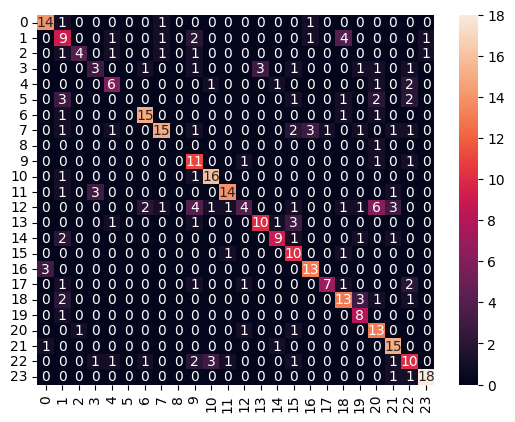

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


In [19]:
import joblib

joblib.dump(model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']